In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/landslide-events/catalog.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
%matplotlib inline
%config InlineBacked.figure_format='retina'
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)

In [3]:
df=pd.read_csv("../input/landslide-events/catalog.csv")
df.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,location_description,latitude,longitude,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,Unknown,38.6009,-77.2682,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,NaN,40.5175,-81.4305,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,Urban area,40.4377,-79.9160,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,Above river,45.3226,-73.7771,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,Below road,37.4325,-82.4931,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [4]:
df['date'].head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [5]:
df['date'].dtype

dtype('O')

In [6]:
df['parse_date']=pd.to_datetime(df['date'],format="%m/%d/%y")

In [7]:
df['parse_date'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: parse_date, dtype: datetime64[ns]

In [8]:
df_month=df['parse_date'].dt.day
df_month.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: parse_date, dtype: float64

In [9]:
df['parse_date'].dt.year.head()

0    2007.0
1    2007.0
2    2007.0
3    2007.0
4    2007.0
Name: parse_date, dtype: float64

In [10]:
df['parse_date'].dt.month.head()

0    3.0
1    3.0
2    4.0
3    4.0
4    4.0
Name: parse_date, dtype: float64

In [11]:
df['parse_date'].dt.weekofyear

0        9.0
1       12.0
2       14.0
3       15.0
4       15.0
        ... 
1688    50.0
1689     8.0
1690     8.0
1691     8.0
1692     9.0
Name: parse_date, Length: 1693, dtype: float64

<AxesSubplot:xlabel='parse_date'>

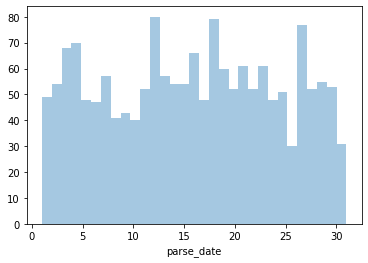

In [12]:
df_month=df_month.dropna()
sns.distplot(df_month,bins=31,kde=False)